# Introduction to neural network classification with tensorflow

**Types of classification**

1. Binary Classification
2. Multiclass Classification
3. Multilabel Classification

## Creating Data of view and fit

In [1]:
from sklearn.datasets import make_circles
import tensorflow as tf

# Make 1000 examples 
n_samples = 1000

# Create samples
X , y = make_circles(n_samples,
                     noise=0.03,
                     random_state=42)

In [2]:
# Check out the features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Lets visualize our data

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,0],"label":y})
circles

,X0,X1,label
0,0.754246,0.754246,1
1,-0.756159,-0.756159,1
2,-0.815392,-0.815392,1
3,-0.393731,-0.393731,1
4,0.442208,0.442208,0
...,...,...,...
995,0.244054,0.244054,0
996,-0.978655,-0.978655,0
997,-0.136900,-0.136900,1
998,0.670362,0.670362,0


<BarContainer object of 1000 artists>

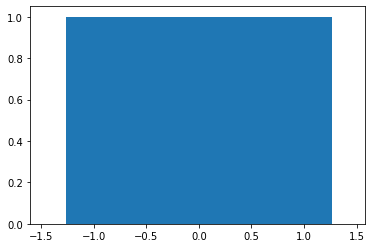

In [5]:
# Visualising with plot
import matplotlib.pyplot as plt

plt.bar(circles.X0,circles.label)

<BarContainer object of 1000 artists>

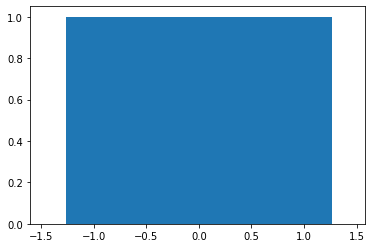

In [6]:
plt.bar(circles.X1,circles.label)

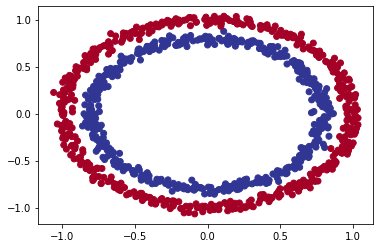

In [7]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

## Input Output Shapes

In [8]:
X.shape,y.shape

((1000, 2), (1000,))

In [9]:
X = tf.constant(X)
y = tf.constant(y)

In [10]:
X,y

(<tf.Tensor: shape=(1000, 2), dtype=float64, numpy=
 array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]])>,
 <tf.Tensor: shape=(1000,), dtype=int64, numpy=
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
  

## Steps in modelling

1. Create or Import The model
2. Compile the model
3. Fit your Data to the model
3. Predict Your Data from the model
4. Evaluate the model
5. Tune your model

In [11]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2.Compile the model

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model

model_1.fit(tf.expand_dims(X,axis=-1),y,epochs=100,verbose=0)

In [12]:
model_1.fit(tf.expand_dims(X,axis=-1),y,epochs=500,verbose=0)

## Improving Our Model

In [13]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933151483535767, 0.5]

In [14]:
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1000),
  tf.keras.layers.Dense(1000),
  tf.keras.layers.Dense(1000),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(tf.expand_dims(X,axis=-1),y,epochs=300,verbose=0)

KeyboardInterrupt: ignored

## Working With Larger Example(Multiclass Classification)


In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Data alwayas sorted in train and test
(train_data,train_labels), (test_data,test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [17]:
print(f"Trainig data:\n{train_data[0]}")
print(f"Trainig label:\n{train_labels[0]}")
print(f"Testing data:\n{test_data[0]}")
print(f"Testing label:\n{train_labels[0]}")

Trainig data:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

In [18]:
# Check the Shape of single dataset
train_data[0].shape,train_labels[0].shape,test_data[0].shape,test_labels[0].shape

((28, 28), (), (28, 28), ())

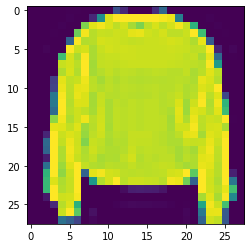

In [20]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [21]:
train_labels[7]

2

In [22]:
# Create a small list so we can index training data to human readable
class_names = ["T-Shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankel Bot"]



9


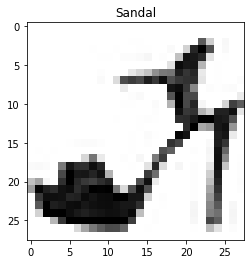

In [32]:
#Plot an example image
index_of_choice=int(input())
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]]);

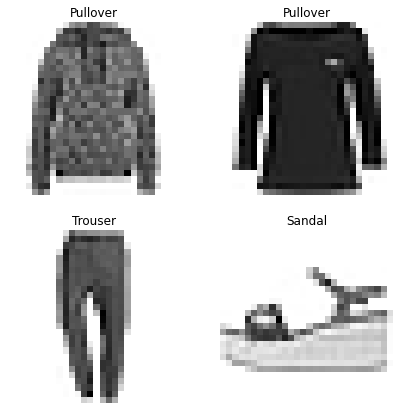

In [36]:
#Plot multiple random images from fashion dataset
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False);

## Bulding a Mulitclass Classification

For our multiclass classification we have same as the binary classification but there are only few things change:

* Input Shape = 28 X 28
* Output Shape = 10 (1 pr class or clothing)
* Loss Function = tf.keras.loss.CategoricalCrossentropy()
  * If You are using one hot encoded, use CategoricalCrossentropy function
  * Else you have to use SparseCategoricalCrossentropy() function
* Output layer activation = softmax



In [42]:
# Set random seed
tf.random.set_seed(42)

# Create The Model
model_multi = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(10,activation="softmax")
])

# Compile The Model
model_multi.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])

# Fitting the model
non_norm_history = model_multi.fit(tf.expand_dims(train_data,axis=-1),train_labels,epochs=100,validation_data=(test_data,test_labels))

Epoch 1/100
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_ac

In [51]:
predict = model_multi.predict(test_data)


### Normaliztion or scaling of data means taking data between 1&0 with applying different methods

In [52]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [57]:
# Creating Model on normalized data

model_multi_norm = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(10,activation="softmax")
])

model_multi_norm.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                         metrics=["accuracy"])

norm_history=model_multi_norm.fit(tf.expand_dims(train_data_norm,axis=-1),train_labels,epochs=50,verbose=0,validation_data=(test_data_norm,test_labels))

In [56]:
model_multi_norm.evaluate(train_data_norm,train_labels)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.5158 - accuracy: 0.8221


[0.5157846808433533, 0.8221333622932434]

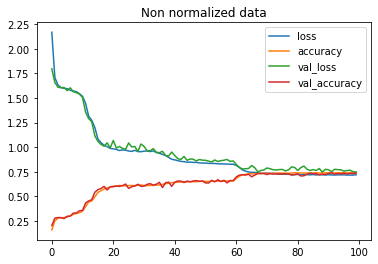

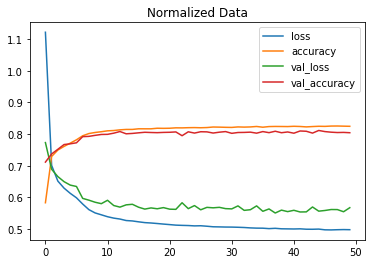

In [60]:
import pandas as pd
#Plot non-normalized data
pd.DataFrame(non_norm_history.history).plot(title="Non normalized data")
#Plot normalized data
pd.DataFrame(norm_history.history).plot(title="Normalized Data");

## Finding The ideal learning Rate

In [63]:
# Set Random Seed
tf.random.set_seed(42)

#Create a model
model_mult_new = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(10,activation="softmax")
])

#Compile The model
model_mult_new.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["accuracy"])

# Create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_mult_new.fit(tf.expand_dims(train_data_norm,axis=-1),train_labels,epochs=40,validation_data=(test_data_norm,test_labels),callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 12s 6ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5

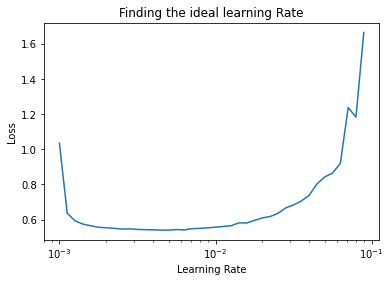

In [64]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning Rate");

In [65]:
# Using Learning Rate in Model

model_mult_lr = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(10,activation="softmax")
])

model_mult_lr.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.0050),
                      metrics=["accuracy"])

model_mult_lr.fit(tf.expand_dims(train_data_norm,axis=-1),train_labels,epochs=40,validation_data=(test_data_norm,test_labels))

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8943 - accuracy: 0.6871 - val_loss: 0.7345 - val_accuracy: 0.7333
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6996 - accuracy: 0.7562 - val_loss: 0.7194 - val_accuracy: 0.7413
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6746 - accuracy: 0.7667 - val_loss: 0.7021 - val_accuracy: 0.7519
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6582 - accuracy: 0.7717 - val_loss: 0.6702 - val_accuracy: 0.7728
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6486 - accuracy: 0.7752 - val_loss: 0.6639 - val_accuracy: 0.7646
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6395 - accuracy: 0.7790 - val_loss: 0.6844 - val_accuracy: 0.7662
Epoch 7/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6347 - accuracy: 0.7801 - val_loss: 0.6563 - val_accuracy:

In [76]:
import random

def plot_random_image(model,images,true_labels,classes):
  i = random.randint(0,len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image,cmap=plt.cm.binary)

  if pred_label == true_label:
    color="green"
  else:
    color="red"

  plt.xlabel("Pred: {} {:2.0f}% (True:{})".format(pred_label,100*tf.reduce_max(pred_probs),true_label),color=color)

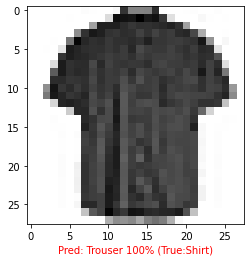

In [81]:
plot_random_image(model_multi_norm,test_data,test_labels,class_names)